## Part of Speech Tagging (Etiquetado Gramatical)

El **Part of Speech Tagging** o **Etiquetado Gramatical** es el proceso de asignar una etiqueta que indica la categoría gramatical a cada token (palabra) de un texto. Estas categorías gramaticales incluyen nombres, verbos, adjetivos, adverbios, pronombres, entre otros. El etiquetado gramatical es fundamental para muchas tareas de NLP, ya que la función de una palabra en una oración y su relación con otras palabras a menudo está determinada por su categoría gramatical.

Por ejemplo:

    En la oración "El perro corre rápidamente", "perro" es un sustantivo, "corre" es un verbo y "rápidamente" es un adverbio.

Este proceso puede ser complicado debido a las ambigüedades del lenguaje. Por ejemplo, la palabra "corre" puede ser un verbo en "Él corre" o un sustantivo en "El corre de la zapatilla es rojo".

NLTK ofrece la función `pos_tag` que etiqueta tokens basándose en su categoría gramatical utilizando modelos preentrenados:

In [3]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

texto = "El perro corre rápidamente."
tokens = word_tokenize(texto)
etiquetas = pos_tag(tokens)

print('Etiquetado Gramatical:', etiquetas)

Etiquetado Gramatical: [('El', 'NNP'), ('perro', 'NN'), ('corre', 'NN'), ('rápidamente', 'NN'), ('.', '.')]


### Penn Treebank Tag Set

El "Penn Treebank Tag Set" es un conjunto de etiquetas gramaticales que se utiliza para etiquetar palabras según su función en una oración. A continuación se describen dos etiquetas:

- **NNP**: Este es el etiquetado para un "Proper Noun, Singular". En español, se refiere a un sustantivo propio en singular. Los sustantivos propios son palabras que hacen referencia a nombres específicos de personas, lugares, organizaciones, etc. Ejemplos en español serían "Juan", "México" o "Apple". En tu oración, "El" ha sido etiquetado como `NNP`, lo que podría ser un error del etiquetador, ya que en inglés "El" no es un sustantivo propio común.

- **NN**: Este es el etiquetado para un "Noun, Singular or Mass". En español, se traduce como un sustantivo en singular o un sustantivo no contable. Estos son nombres que se refieren a personas, lugares, cosas, ideas, o conceptos que no tienen una forma plural distinta para indicar múltiples cantidades. Ejemplos en español serían "perro", "ciudad" o "agua". En tu oración, "perro", "corre" y "rápidamente" han sido etiquetados como `NN`. Es importante notar que "corre" y "rápidamente" no son sustantivos en español, lo que indica que el etiquetado

Otros ejemplos de etiquetado de palabras son: 
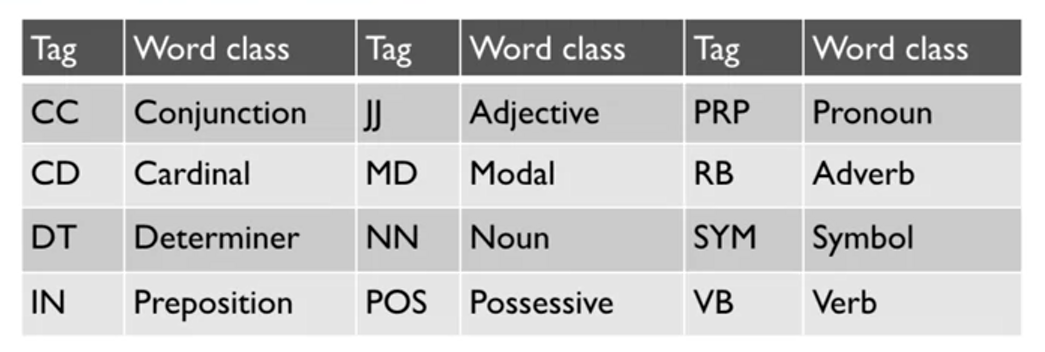

para ver con más detalles una determinada etiqueta podemos usar la siguiente nonmeclatura en python:

In [5]:
import nltk
nltk.help.upenn_tagset('MD')

MD: modal auxiliary
    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would


#### Caso práctico

In [7]:
from nltk.tokenize import word_tokenize

texto = "Children shoudn't drink a sugary drink before bed."
tokens = word_tokenize(texto)
print('Tokens:', tokens)
tagged_tokens = nltk.pos_tag(tokens)
tagged_tokens


Tokens: ['Children', 'shoud', "n't", 'drink', 'a', 'sugary', 'drink', 'before', 'bed', '.']


[('Children', 'NNP'),
 ('shoud', 'VBP'),
 ("n't", 'RB'),
 ('drink', 'VB'),
 ('a', 'DT'),
 ('sugary', 'JJ'),
 ('drink', 'NN'),
 ('before', 'IN'),
 ('bed', 'NN'),
 ('.', '.')]

### Parsing Sentence Structure (Análisis Estructural de las Sentencias)

El **parsing** o análisis estructural de las sentencias se refiere al proceso de analizar una sentencia de acuerdo a una gramática dada, para determinar su estructura y cómo las palabras en ella se relacionan entre sí. El resultado del parsing es comúnmente representado en una estructura de árbol, donde los nodos representan palabras o frases y las ramas representan relaciones gramaticales entre ellas.
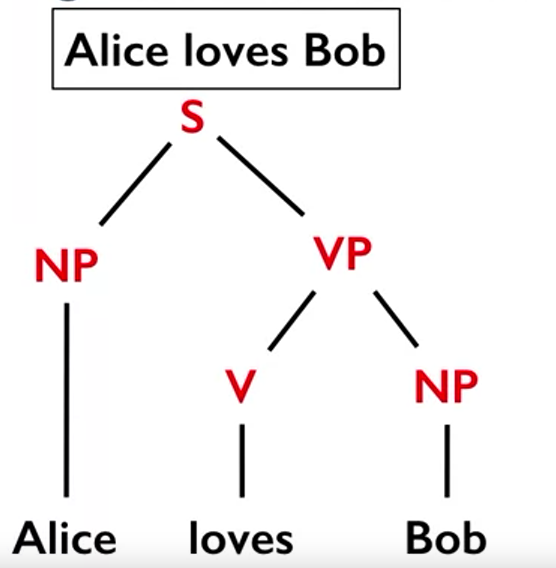

Este proceso es crucial en muchas tareas de NLP, ya que la estructura y las relaciones entre las palabras en una sentencia pueden influir o determinar su significado. Por ejemplo, la frase "Juan vio a María con el telescopio" puede tener dos interpretaciones diferentes dependiendo de quién tenía el telescopio, y un análisis estructural puede ayudar a discernir entre estas interpretaciones.

Algunos puntos clave sobre el parsing son:

- **Gramáticas y Formalismos**: El parsing depende de una gramática que define cómo pueden estructurarse las palabras en una sentencia. Hay diferentes formalismos gramaticales, como las gramáticas dependientes o las gramáticas de constituyentes.

- **Tipos de Parsing**: Existen diversos métodos y algoritmos para realizar parsing, desde enfoques basados en reglas hasta métodos basados en aprendizaje automático.

- **Aplicaciones**: El parsing es utilizado en numerosas aplicaciones como la traducción automática, la generación de texto, y la extracción de información, entre otros.

En NLTK y otras bibliotecas de NLP, existen herramientas y recursos específicos para realizar parsing de sentencias, lo que permite analizar la estructura de las mismas y obtener representaciones detalladas de su estructura.


In [14]:
# Importamos la función para tokenizar palabras de nltk
from nltk.tokenize import word_tokenize

# Tokenizamos la sentencia "Alice loves Bob"
sentence2 = nltk.word_tokenize("Alice loves Bob")

# Definimos una gramática usando la CFG (Context-Free Grammar) proporcionada por nltk
# La gramática define una estructura lingüística básica con las siguientes reglas:
# 1. Una sentencia (S) está compuesta por un sustantivo (NP) seguido de un verbo (VP).
# 2. Un predicado verbal (VP) está compuesto por un verbo (V) seguido de un sustantivo (NP).
# 3. Los sustantivos posibles (NP) son 'Alice' o 'Bob'.
# 4. El único verbo (V) posible es 'loves'.
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    VP -> V NP
    NP -> 'Alice' | 'Bob'
    V -> 'loves'
""")

# Creamos un parser usando el ChartParser de nltk, alimentándolo con la gramática definida anteriormente
parser = nltk.ChartParser(grammar)

# Usamos el parser para analizar la estructura (parse) de la sentencia tokenizada
# El resultado es una lista de árboles de análisis posibles para la sentencia, según la gramática proporcionada
trees = parser.parse_all(sentence2)

# Mostrar los árboles resultantes
trees


[Tree('S', [Tree('NP', ['Alice']), Tree('VP', [Tree('V', ['loves']), Tree('NP', ['Bob'])])])]

### Ambigüedad en el Etiquetado y el Parsing

El lenguaje natural es inherentemente ambiguo. A menudo, las mismas palabras o estructuras pueden tener múltiples interpretaciones dependiendo del contexto o la construcción. Esta ambigüedad se presenta tanto en el etiquetado gramatical como en el análisis estructural (parsing) de las sentencias.

#### Ambigüedad en el Etiquetado

El etiquetado gramatical, o Part of Speech Tagging, implica asignar a cada palabra en un texto una etiqueta que indica su categoría gramatical (sustantivo, verbo, adjetivo, etc.). La ambigüedad se presenta cuando una palabra puede ser etiquetada de múltiples maneras, dependiendo del contexto.

- **Ejemplo**: La palabra "banco" podría referirse a una entidad financiera (sustantivo) o al acto de apoyar o respaldar algo (verbo) dependiendo del contexto. 

#### Ambigüedad en el Parsing

El parsing, o análisis estructural, implica determinar la estructura de una sentencia y cómo sus componentes se relacionan entre sí. Una sentencia puede tener múltiples interpretaciones o estructuras válidas, lo que lleva a la ambigüedad estructural.

- **Ejemplo**: Considera la sentencia "Juan vio al hombre con el telescopio". Esta sentencia puede interpretarse de dos maneras: Juan usó un telescopio para ver al hombre, o Juan vio a un hombre que tenía un telescopio. Ambas interpretaciones son gramaticalmente válidas y llevarían a diferentes estructuras de análisis.

#### Enfrentando la Ambigüedad

Los sistemas modernos de NLP utilizan varios métodos para enfrentar la ambigüedad:

1. **Contexto**: Al considerar palabras o estructuras circundantes, es posible desambiguar el significado o función de una palabra.
2. **Probabilidad**: Modelos estadísticos o basados en aprendizaje automático pueden determinar la interpretación más probable basándose en datos de entrenamiento.
3. **Conocimiento del Mundo**: Algunos sistemas pueden usar conocimiento externo para ayudar a desambiguar el significado.

A pesar de estos métodos, la ambigüedad sigue siendo un reto en el procesamiento del lenguaje natural, y garantizar interpretaciones correctas y coherentes es una tarea en curso en el campo del NLP.


### Parse Tree Collection (Colección de Árboles de Análisis)

Un **Parse Tree**, también conocido como árbol de análisis o árbol sintáctico, es una representación de la estructura gramatical de una cadena de acuerdo a una gramática formal. Muestra cómo las palabras en la cadena se relacionan entre sí de acuerdo con las reglas de esa gramática.

Una **Parse Tree Collection** es simplemente un conjunto de estos árboles de análisis. Tal colección es especialmente útil en contextos donde una sentencia o fragmento de texto tiene múltiples interpretaciones gramaticales válidas y, por lo tanto, puede ser representada por más de un árbol de análisis.

#### Características Principales:

1. **Nodos y Ramas**: En un árbol de análisis, las palabras de la sentencia suelen ser las hojas del árbol, y los nodos representan las categorías gramaticales (como sustantivo, verbo, oración, etc.). Las ramas conectan los nodos y representan las relaciones gramaticales entre ellos.

2. **Ambigüedad Estructural**: Cuando una sentencia puede ser analizada de múltiples maneras debido a la ambigüedad en su estructura, se genera más de un árbol de análisis. La colección completa de estos árboles representa todas las posibles estructuras gramaticales de la sentencia.

3. **Utilidad en NLP**: Las colecciones de árboles de análisis son útiles en tareas de Procesamiento de Lenguaje Natural (NLP) para analizar y entender la estructura y el significado de las sentencias. Ayudan a los investigadores y a las máquinas a discernir la ambigüedad y a seleccionar la interpretación más probable o relevante.

#### Uso en NLTK:

En herramientas como NLTK, los parsers generan árboles de análisis para las sentencias. Cuando se enfrentan a la ambigüedad, estos parsers pueden generar múltiples árboles, formando así una colección. Estos árboles pueden ser inspeccionados, visualizados y analizados para obtener una comprensión más profunda de la estructura gramatical del texto.



### Treebanks

Un **Treebank** es esencialmente una base de datos anotada de sentencias, donde cada sentencia ha sido analizada y representada por su correspondiente árbol de análisis. Estos árboles representan la estructura gramatical y las relaciones entre las palabras de la sentencia. 

La creación de un Treebank es una tarea compleja que involucra el esfuerzo coordinado de lingüistas, desarrolladores y otros profesionales. Estos equipos trabajan arduamente para analizar y etiquetar manualmente cada sentencia de acuerdo con reglas gramaticales y estructurales específicas. La precisión y la coherencia son esenciales, y a menudo se requieren múltiples rondas de revisión y corrección.

#### Importancia de los Treebanks:

1. **Base para Modelos Automatizados**: Los Treebanks son fundamentales para entrenar modelos automáticos de parsing. Al tener ejemplos de cómo deberían estructurarse las sentencias, estos modelos aprenden a analizar nuevas sentencias de manera autónoma.

2. **Estándar de Oro**: Sirven como un "estándar de oro" para la evaluación de algoritmos de análisis estructural, permitiendo comparar la salida de un sistema con las anotaciones manuales del Treebank.

3. **Investigación Lingüística**: Los Treebanks son recursos valiosos para los lingüistas, ya que ofrecen insights sobre la estructura y el uso del lenguaje en diferentes contextos y géneros.

#### Uso en NLTK con `parsed_sents`:

NLTK, entre otras bibliotecas de NLP, incluye acceso a varios Treebanks. Con la función `parsed_sents`, es posible obtener las sentencias del Treebank ya analizadas y representadas como árboles. Estos árboles pueden ser usados para estudios, para entrenar modelos, o como base para algoritmos de análisis estructural.

Por ejemplo, el Penn Treebank es uno de los Treebanks más famosos y ampliamente utilizados en el campo del NLP. Incluye anotaciones detalladas de un amplio rango de géneros textuales y ha sido fundamental en el avance de muchas áreas dentro del Procesamiento de Lenguaje Natural.


In [17]:
# Importando las bibliotecas necesarias
import nltk
from nltk.corpus import treebank

# Asegúrate de haber descargado el treebank usando nltk.download() si aún no lo has hecho
# nltk.download('treebank')

# Cargamos las sentencias del archivo 'wsj_0001.mrg' del Treebank
sentences = treebank.parsed_sents('wsj_0001.mrg')

# Imprimimos las primeras 3 sentencias para visualizar
for sentence in sentences[:3]:
    print(sentence)
    print("\n" + "-"*80 + "\n")  # línea divisoria para separar las sentencias

# Si deseas visualizar el árbol de una sentencia en particular (por ejemplo, la primera),
# puedes hacerlo con el siguiente código (esto abrirá una ventana nueva con el árbol visualizado):
# sentences[0].draw()
sentences[0].draw()

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))

--------------------------------------------------------------------------------

(S
  (NP-SBJ (NNP Mr.) (NNP Vinken))
  (VP
    (VBZ is)
    (NP-PRD
      (NP (NN chairman))
      (PP
        (IN of)
        (NP
          (NP (NNP Elsevier) (NNP N.V.))
          (, ,)
          (NP (DT the) (NNP Dutch) (VBG publishing) (NN group))))))
  (. .))

--------------------------------------------------------------------------------



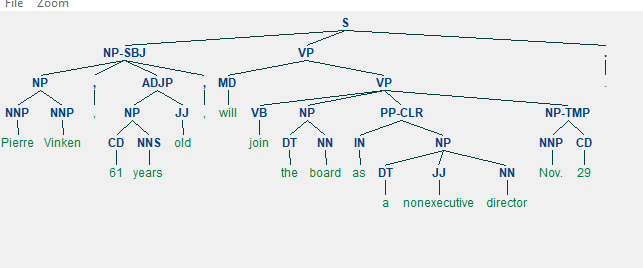

In [1]:
"hello".islower()

True

In [2]:
string

NameError: name 'string' is not defined

In [3]:
String

NameError: name 'String' is not defined

In [4]:
str

str

In [5]:
str.islower('Hello world')

False